<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part3/ch08_two_way_anova.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.2 Two-Factor Experiments: Two-Way ANOVA

## Beyond One Factor

### The Limitation of One-Way ANOVA

One-way ANOVA studies **one factor** at a time:
- Different fertilizers
- Different teaching methods  
- Different drug dosages

But real-world outcomes often depend on **multiple factors**!

### Two-Way ANOVA

Studies **two factors simultaneously**:
- Fertilizer type **and** watering schedule
- Teaching method **and** class size
- Drug dosage **and** patient age

### Advantages

1. **More efficient**: Study two factors in one experiment
2. **Detect interactions**: See if factors work together
3. **More realistic**: Real systems have multiple influences

## The Two-Way ANOVA Model

### Notation

- Factor A has **a levels** (e.g., 3 fertilizer types)
- Factor B has **b levels** (e.g., 2 watering schedules)
- **n replicates** per combination (cell)
- Total observations: N = a × b × n

### The Model

$$
y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk}
$$

where:
- \(\mu\) = grand mean
- \(\alpha_i\) = effect of level i of Factor A
- \(\beta_j\) = effect of level j of Factor B
- \((\alpha\beta)_{ij}\) = **interaction** effect
- \(\epsilon_{ijk}\) = random error

### Three Hypotheses

**Main Effect of Factor A**:
- H₀ᴬ: \(\alpha_1 = \alpha_2 = \cdots = \alpha_a = 0\) (no effect of A)
- H₁ᴬ: At least one \(\alpha_i \neq 0\)

**Main Effect of Factor B**:
- H₀ᴮ: \(\beta_1 = \beta_2 = \cdots = \beta_b = 0\) (no effect of B)
- H₁ᴮ: At least one \(\beta_j \neq 0\)

**Interaction A×B**:
- H₀ᴬᴮ: \((\alpha\beta)_{ij} = 0\) for all i, j (no interaction)
- H₁ᴬᴮ: At least one \((\alpha\beta)_{ij} \neq 0\)

## Understanding Interactions

### What is an Interaction?

An **interaction** occurs when the effect of one factor depends on the level of another factor.

### Example: No Interaction

Fertilizer effect is the same regardless of watering:
```
   Yield
     ^
  30 |
     |     B (high water)
  25 |    /
     |   /
  20 |  /  A (low water)
     | /
  15 |/
     +----------> Fertilizer
        1   2   3

Parallel lines = No interaction
```

### Example: Interaction Present

In [ ]:
Fertilizer effect depends on watering:

   Yield
     ^
  30 |        B (high water)
     |       /
  25 |      /
     |     X
  20 |    /  \
     |   /    \ A (low water)
  15 |  /      \
     +----------> Fertilizer
        1   2   3

Crossing lines = Interaction!

## Partitioning Variance in Two-Way ANOVA

### Sum of Squares Decomposition

$$
\text{SST} = \text{SSA} + \text{SSB} + \text{SSAB} + \text{SSE}
$$

where:
- **SST**: Total sum of squares
- **SSA**: Sum of squares for Factor A
- **SSB**: Sum of squares for Factor B  
- **SSAB**: Sum of squares for interaction A×B
- **SSE**: Sum of squares for error (residual)

### Degrees of Freedom

- **dfₐ**: a - 1 (Factor A)
- **dfᴮ**: b - 1 (Factor B)
- **dfₐᴮ**: (a-1)(b-1) (Interaction)
- **dfₑ**: ab(n-1) (Error)
- **dfₜ**: abn - 1 (Total)

### F-Statistics

$$
F_A = \frac{\text{MSA}}{\text{MSE}}, \quad F_B = \frac{\text{MSB}}{\text{MSE}}, \quad F_{AB} = \frac{\text{MSAB}}{\text{MSE}}
$$

## Python Example: Fertilizer × Watering

Two-Way ANOVA: Fertilizer × Watering

Data Summary:
                  mean       std  count
Fertilizer Water                       
F1         High   23.4  1.140175      5
           Low    18.4  1.140175      5
F2         High   29.4  1.140175      5
           Low    20.6  1.140175      5
F3         High   20.6  1.140175      5
           Low    17.4  1.140175      5

ANOVA Table
                            sum_sq    df           F        PR(>F)
C(Fertilizer)           188.066667   2.0   72.333333  6.889437e-11
C(Water)                240.833333   1.0  185.256410  8.831093e-13
C(Fertilizer):C(Water)   40.866667   2.0   15.717949  4.335527e-05
Residual                 31.200000  24.0         NaN           NaN

Interpretation

Main Effect of Fertilizer: p = 0.0000
  → Significant: Fertilizer type affects yield

Main Effect of Water: p = 0.0000
  → Significant: Watering level affects yield

Interaction Fertilizer × Water: p = 0.0000
  → Significant: Effect of fertilizer depends on water

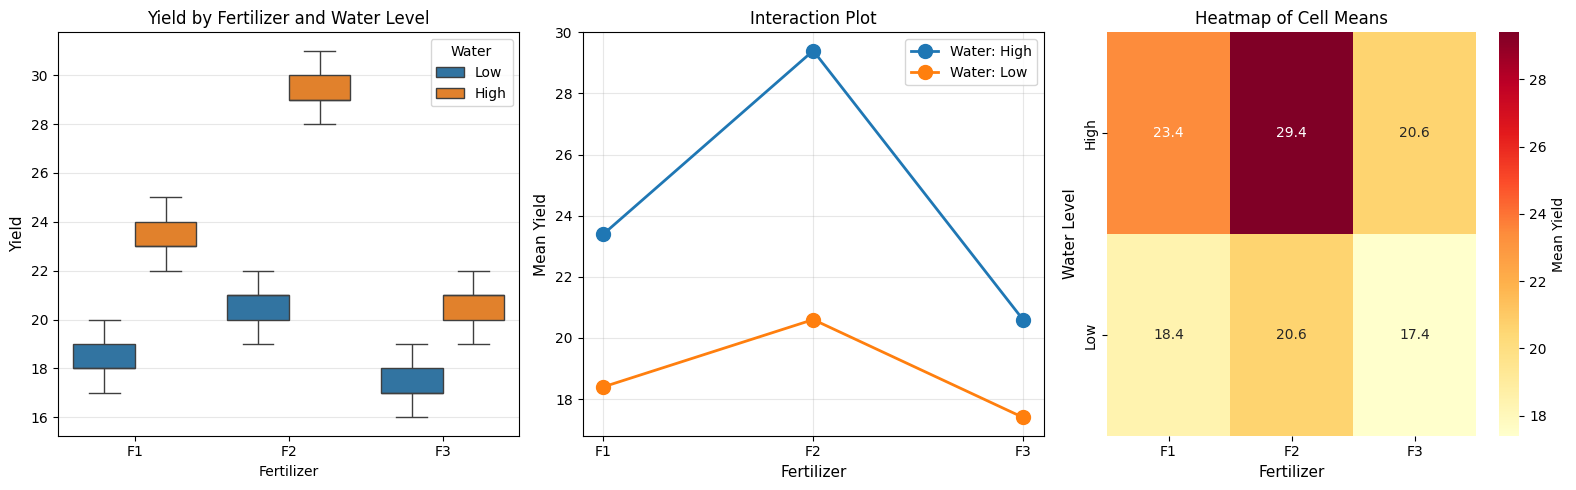

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Create experimental data
# Factor A: Fertilizer (3 types)
# Factor B: Water (2 levels: low, high)
# n = 5 replicates per cell

data = {
    'Yield': [
        # Fertilizer 1, Low water
        18, 19, 17, 20, 18,
        # Fertilizer 1, High water
        22, 24, 23, 25, 23,
        # Fertilizer 2, Low water
        20, 21, 19, 22, 21,
        # Fertilizer 2, High water
        28, 30, 29, 31, 29,
        # Fertilizer 3, Low water
        17, 18, 16, 19, 17,
        # Fertilizer 3, High water
        20, 21, 19, 22, 21
    ],
    'Fertilizer': ['F1']*10 + ['F2']*10 + ['F3']*10,
    'Water': ['Low']*5 + ['High']*5 + ['Low']*5 + ['High']*5 + ['Low']*5 + ['High']*5
}

df = pd.DataFrame(data)

print("Two-Way ANOVA: Fertilizer × Watering")
print("="*70)
print("\nData Summary:")
print(df.groupby(['Fertilizer', 'Water'])['Yield'].agg(['mean', 'std', 'count']))

# Perform two-way ANOVA using statsmodels
try:
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    
    # Fit the model
    model = ols('Yield ~ C(Fertilizer) + C(Water) + C(Fertilizer):C(Water)', data=df).fit()
    
    # ANOVA table
    anova_table = anova_lm(model, typ=2)
    
    print("\n" + "="*70)
    print("ANOVA Table")
    print("="*70)
    print(anova_table)
    
    # Extract p-values
    p_fertilizer = anova_table.loc['C(Fertilizer)', 'PR(>F)']
    p_water = anova_table.loc['C(Water)', 'PR(>F)']
    p_interaction = anova_table.loc['C(Fertilizer):C(Water)', 'PR(>F)']
    
    print("\n" + "="*70)
    print("Interpretation")
    print("="*70)
    
    alpha = 0.05
    
    print(f"\nMain Effect of Fertilizer: p = {p_fertilizer:.4f}")
    if p_fertilizer < alpha:
        print("  → Significant: Fertilizer type affects yield")
    else:
        print("  → Not significant: No effect of fertilizer type")
    
    print(f"\nMain Effect of Water: p = {p_water:.4f}")
    if p_water < alpha:
        print("  → Significant: Watering level affects yield")
    else:
        print("  → Not significant: No effect of watering level")
    
    print(f"\nInteraction Fertilizer × Water: p = {p_interaction:.4f}")
    if p_interaction < alpha:
        print("  → Significant: Effect of fertilizer depends on watering!")
        print("     Must interpret main effects carefully.")
    else:
        print("  → Not significant: Fertilizer and water act independently")
        print("     Main effects can be interpreted separately.")
        
except ImportError:
    print("\nPlease install statsmodels: pip install statsmodels")
    print("Performing manual calculation...")
    
    # Manual calculation (simplified)
    grand_mean = df['Yield'].mean()
    
    # Cell means
    cell_means = df.groupby(['Fertilizer', 'Water'])['Yield'].mean()
    print(f"\nCell means:\n{cell_means}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Box plot by both factors
sns.boxplot(data=df, x='Fertilizer', y='Yield', hue='Water', ax=axes[0])
axes[0].set_title('Yield by Fertilizer and Water Level', fontsize=12)
axes[0].set_ylabel('Yield', fontsize=11)
axes[0].legend(title='Water')
axes[0].grid(alpha=0.3, axis='y')

# 2. Interaction plot
means = df.groupby(['Fertilizer', 'Water'])['Yield'].mean().unstack()
for water_level in means.columns:
    axes[1].plot(means.index, means[water_level], 'o-', 
                 linewidth=2, markersize=10, label=f'Water: {water_level}')
axes[1].set_xlabel('Fertilizer', fontsize=11)
axes[1].set_ylabel('Mean Yield', fontsize=11)
axes[1].set_title('Interaction Plot', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

# 3. Heatmap of cell means
cell_means_pivot = df.groupby(['Water', 'Fertilizer'])['Yield'].mean().unstack()
sns.heatmap(cell_means_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[2], cbar_kws={'label': 'Mean Yield'})
axes[2].set_title('Heatmap of Cell Means', fontsize=12)
axes[2].set_ylabel('Water Level', fontsize=11)
axes[2].set_xlabel('Fertilizer', fontsize=11)

plt.tight_layout()
plt.savefig('two_way_anova.png', dpi=150, bbox_inches='tight')
plt.show()


## Interpreting Interactions

### Rule of Thumb

1. **Always test interaction first**
2. If interaction is significant:
   - Main effects may be misleading
   - Describe the interaction pattern
   - Consider simple effects analysis
3. If no interaction:
   - Interpret main effects independently

### Simple Effects Analysis

When interaction is significant, test effects of one factor **at each level** of the other.

In [2]:
def simple_effects_analysis(df, factor1, factor2, response):
    """
    Analyze simple effects when interaction is significant.
    """
    print(f"Simple Effects: {factor1} at each level of {factor2}")
    print("="*70)
    
    for level in df[factor2].unique():
        subset = df[df[factor2] == level]
        groups = [subset[subset[factor1] == f][response].values 
                  for f in subset[factor1].unique()]
        
        f_stat, p_value = stats.f_oneway(*groups)
        
        print(f"\n{factor2} = {level}:")
        print(f"  F-statistic = {f_stat:.3f}")
        print(f"  p-value = {p_value:.4f}")
        if p_value < 0.05:
            print(f"  → {factor1} has significant effect at {factor2} = {level}")
        else:
            print(f"  → {factor1} has no significant effect at {factor2} = {level}")

# Example usage
if p_interaction < 0.05:
    simple_effects_analysis(df, 'Fertilizer', 'Water', 'Yield')

Simple Effects: Fertilizer at each level of Water

Water = Low:
  F-statistic = 10.308
  p-value = 0.0025
  → Fertilizer has significant effect at Water = Low

Water = High:
  F-statistic = 77.744
  p-value = 0.0000
  → Fertilizer has significant effect at Water = High



## Balanced vs. Unbalanced Designs

### Balanced Design

**Equal sample sizes** in all cells (nᵢⱼ = n for all i,j)

**Advantages**:
- Simpler calculations
- More robust to assumption violations
- Equal power for all tests

### Unbalanced Design

**Unequal sample sizes** across cells

**Challenges**:
- Different sum of squares types (Type I, II, III)
- Interpretation more complex
- Less robust

**Recommendation**: Always strive for balanced designs!

## Effect Sizes in Two-Way ANOVA

### Partial Eta-Squared

Proportion of variance explained by each factor, **controlling for** other factors:

$$
\eta^2_p(A) = \frac{\text{SSA}}{\text{SSA} + \text{SSE}}
$$

In [3]:
def partial_eta_squared(anova_table):
    """
    Calculate partial eta-squared for each effect.
    """
    print("\nEffect Sizes (Partial η²)")
    print("="*60)
    
    SSE = anova_table.loc['Residual', 'sum_sq']
    
    for index in anova_table.index[:-1]:  # Exclude residual
        SS_effect = anova_table.loc[index, 'sum_sq']
        eta_sq_p = SS_effect / (SS_effect + SSE)
        
        if eta_sq_p < 0.01:
            size = "negligible"
        elif eta_sq_p < 0.06:
            size = "small"
        elif eta_sq_p < 0.14:
            size = "medium"
        else:
            size = "large"
        
        print(f"{index:<30}: η²_p = {eta_sq_p:.3f} ({size})")

partial_eta_squared(anova_table)


Effect Sizes (Partial η²)
C(Fertilizer)                 : η²_p = 0.858 (large)
C(Water)                      : η²_p = 0.885 (large)
C(Fertilizer):C(Water)        : η²_p = 0.567 (large)




## Assumptions of Two-Way ANOVA

Same as one-way ANOVA:

1. **Independence** of observations
2. **Normality** within each cell
3. **Homogeneity of variance** across all cells

### Checking Assumptions

In [4]:
def check_two_way_assumptions(df, factor1, factor2, response):
    """
    Check ANOVA assumptions for two-way design.
    """
    # 1. Homogeneity of variance (Levene's test)
    groups = [df[(df[factor1]==f1) & (df[factor2]==f2)][response].values
              for f1 in df[factor1].unique()
              for f2 in df[factor2].unique()]
    
    stat, p = stats.levene(*groups)
    print("Homogeneity of Variance (Levene's Test)")
    print(f"  Statistic = {stat:.3f}, p-value = {p:.4f}")
    if p > 0.05:
        print("  → Assumption satisfied (p > 0.05)")
    else:
        print("  → WARNING: Variances may be unequal (p < 0.05)")
    
    # 2. Normality (residuals)
    try:
        from statsmodels.formula.api import ols
        model = ols(f'{response} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})', 
                    data=df).fit()
        residuals = model.resid
        
        stat, p = stats.shapiro(residuals)
        print("\nNormality of Residuals (Shapiro-Wilk Test)")
        print(f"  Statistic = {stat:.3f}, p-value = {p:.4f}")
        if p > 0.05:
            print("  → Assumption satisfied (p > 0.05)")
        else:
            print("  → WARNING: Residuals may not be normal (p < 0.05)")
    except:
        print("\nInstall statsmodels to check normality of residuals")

check_two_way_assumptions(df, 'Fertilizer', 'Water', 'Yield')

Homogeneity of Variance (Levene's Test)
  Statistic = 0.000, p-value = 1.0000
  → Assumption satisfied (p > 0.05)

Normality of Residuals (Shapiro-Wilk Test)
  Statistic = 0.915, p-value = 0.0199
  → WARNING: Residuals may not be normal (p < 0.05)


## Summary

### When to Use Two-Way ANOVA

✅ Two categorical independent variables (factors)  
✅ One continuous dependent variable  
✅ Want to study main effects AND interactions  
✅ Balanced design (equal n per cell) preferred  

### Key Concepts

1. **Main effects**: Effect of each factor averaged over the other
2. **Interaction**: Effect of one factor depends on the other
3. **Test interaction first**: Guides interpretation of main effects
4. **Balanced designs**: Simplify analysis and interpretation
5. **Effect sizes**: Report partial η² for each effect

### Two-Way ANOVA Table Template

| Source | SS | df | MS | F | p-value |
|--------|----|----|-------|---|------|
| Factor A | SSA | a-1 | MSA | Fₐ | pₐ |
| Factor B | SSB | b-1 | MSB | Fᴮ | pᴮ |
| A × B | SSAB | (a-1)(b-1) | MSAB | Fₐᴮ | pₐᴮ |
| Error | SSE | ab(n-1) | MSE | | |
| Total | SST | abn-1 | | | |